In [1]:
%run ../includes/common-20230414.ipynb

CPython 2025-10-19T16:47:48.639092


CPU times: user 530 µs, sys: 0 ns, total: 530 µs
Wall time: 539 µs


In [19]:
resultfiles = {
    # 'Baseline': 'runs/example/baseline/acceptall-1_lru_366.475GB/full_0_0.1_cache_perf.txt.lzma',
    # 'DT-SLRU': 'runs/example/dt-slru/acceptall-1_lru_366.475GB/full_0_0.1_cache_perf.txt.lzma',
    'EDE': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_cache_perf.txt.lzma',
}

res = {}
for label, filename in resultfiles.items():
    print(label, filename)
    res[label] = results.get({'Region': 'Region1', 'Filename':f'../../{filename}'})

EDE runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_cache_perf.txt.lzma
Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB/s)', 'IOPS Saved Ratio', 'Service Time Saved Ratio', 'Hit Rate (Hz)', 'AP Threshold', 'AP Probability', 'Cache Size (GB)', 'Wasted', 'Evictions', 'Filename',
       ...
       'WarmupTime', 'Prefetch Ratio', 'Completed', 'Region', 'ExperimentSuffix', 'ConfigFile', 'Target Cache Size', 'RegionLabel', 'RegionLabelOrig', 'AdmissionPolicyLabel'], dtype='object', length=463)


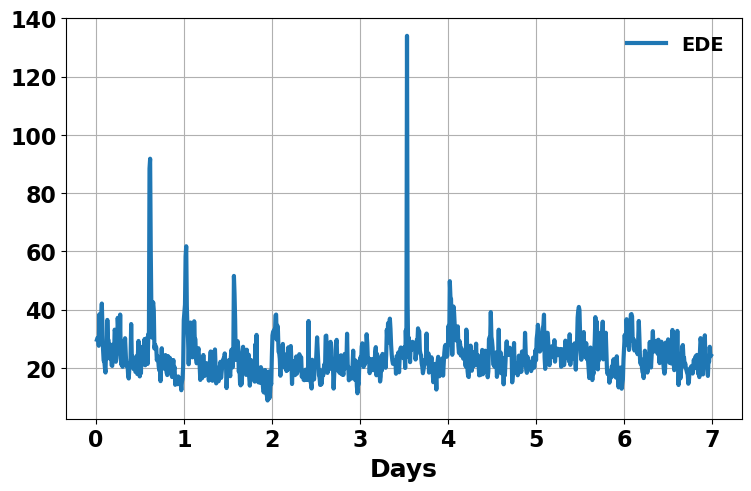

In [20]:
ax = plt.gca()
for label, resv in res.items():
    # if label in ['Baseline', 'DT-SLRU', 'EDE']:
    #     continue
    d_ = res[label].progress['GET+PUT'][600]
    d_['Days'] = d_['Elapsed Trace Time'] / 3600 / 24
    d_.plot(x='Days', y='Util', ax=ax, label=label)
# res['Baleen (ML-Range on Partial-Hit)'].progress['GET+PUT'][600].plot(x='Elapsed Trace Time', y='Util', ax=ax)

In [13]:
rows = []
for label, resv in res.items():
    resv.summary['Label'] = label
    rows.append(resv.summary)
df = pd.concat(rows)

In [17]:
df['ProtectedCap']

0    0.2
Name: ProtectedCap, dtype: float64

In [18]:
df['α_TTL']

0    0.1
Name: α_TTL, dtype: float64

In [54]:
ede_pcap_resultfiles = {
    'EDE-pcap0.0': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_pcap_0.0_cache_perf.txt.lzma',
    'EDE-pcap0.1': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_pcap_0.1_cache_perf.txt.lzma',
    'EDE-pcap0.2': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_pcap_0.2_cache_perf.txt.lzma',
    'EDE-pcap0.3': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_pcap_0.3_cache_perf.txt.lzma',
    'EDE-pcap0.4': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_pcap_0.4_cache_perf.txt.lzma',
    'EDE-pcap0.5': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_pcap_0.5_cache_perf.txt.lzma',
    'EDE-pcap0.6': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_pcap_0.6_cache_perf.txt.lzma',
    'EDE-pcap0.7': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_pcap_0.7_cache_perf.txt.lzma',
    'EDE-pcap0.8': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_pcap_0.8_cache_perf.txt.lzma',
    'EDE-pcap0.9': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_pcap_0.9_cache_perf.txt.lzma',
}

ede_pcap_res = {}
for label, filename in ede_pcap_resultfiles.items():
    # print(label, filename)
    ede_pcap_res[label] = results.get({'Region': 'Region1', 'Filename':f'../../{filename}'})
    
ede_pcap_rows = []
for label, resv in ede_pcap_res.items():
    resv.summary['Label'] = label
    ede_pcap_rows.append(resv.summary)
ede_pcap_df = pd.concat(ede_pcap_rows)

Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB/s)', 'IOPS Saved Ratio', 'Service Time Saved Ratio', 'Hit Rate (Hz)', 'AP Threshold', 'AP Probability', 'Cache Size (GB)', 'Wasted', 'Evictions', 'Filename',
       ...
       'WarmupTime', 'Prefetch Ratio', 'Completed', 'Region', 'ExperimentSuffix', 'ConfigFile', 'Target Cache Size', 'RegionLabel', 'RegionLabelOrig', 'AdmissionPolicyLabel'], dtype='object', length=463)
Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB/s)', 'IOPS Saved Ratio', 'Service Time Saved Ratio', 'Hit Rate (Hz)', 'AP Threshold', 'AP Probability', 'Cache Size (GB)', 'Wasted', 'Evictions', 'Filename',
       ...
       'WarmupTime', 'Prefetch Ratio', 'Completed', 'Region', 'ExperimentSuffix', 'ConfigFile', 'Target Cache Size', 'RegionLabel', 'RegionLabelOrig', 'AdmissionPolicyLabel'], dtype='object', length=463)
Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB

0    30.813843
0    30.813843
0    30.813843
0    30.813843
0    30.813843
0    30.813843
0    30.813843
0    30.813843
0    30.813843
0    30.813843
Name: PeakServiceTimeUsed1, dtype: float64


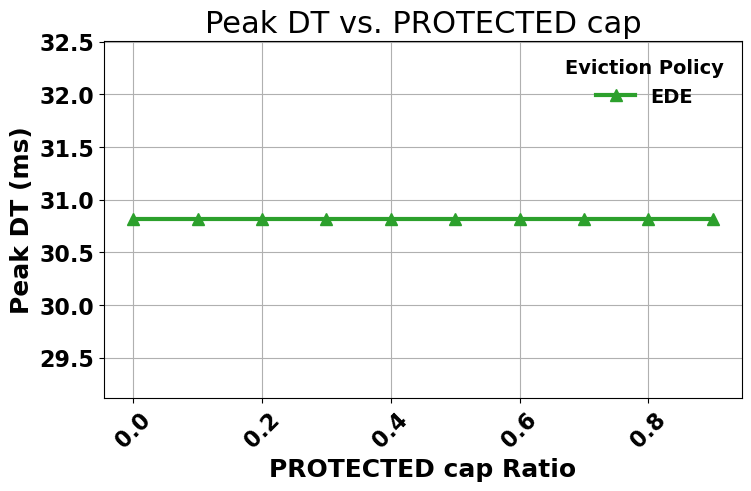

In [55]:
print(ede_pcap_df['PeakServiceTimeUsed1'])

plt.plot(
    ede_pcap_df['ProtectedCap'],
    ede_pcap_df['PeakServiceTimeUsed1'],
    marker='^',
    linewidth=3,
    color='tab:green',
    label='EDE'
)

# plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.xticks(rotation=45) 
plt.title("Peak DT vs. PROTECTED cap")
plt.xlabel("PROTECTED cap Ratio")
plt.ylabel("Peak DT (ms)")
plt.grid(True)
plt.legend(title="Eviction Policy")
plt.show()

In [40]:
ede_ewma_resultfiles = {
    # 'EDE-ewma0.0': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_pcap_0.0_cache_perf.txt.lzma',
    'EDE-ewma0.1': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_ewma_0.1_cache_perf.txt.lzma',
    'EDE-ewma0.2': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_ewma_0.2_cache_perf.txt.lzma',
    'EDE-ewma0.3': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_ewma_0.3_cache_perf.txt.lzma',
    'EDE-ewma0.4': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_ewma_0.4_cache_perf.txt.lzma',
    'EDE-ewma0.5': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_ewma_0.5_cache_perf.txt.lzma',
    'EDE-ewma0.6': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_ewma_0.6_cache_perf.txt.lzma',
    'EDE-ewma0.7': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_ewma_0.7_cache_perf.txt.lzma',
    'EDE-ewma0.8': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_ewma_0.8_cache_perf.txt.lzma',
    'EDE-ewma0.9': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_ewma_0.9_cache_perf.txt.lzma',
}

ede_ewma_res = {}
for label, filename in ede_ewma_resultfiles.items():
    # print(label, filename)
    ede_ewma_res[label] = results.get({'Region': 'Region1', 'Filename':f'../../{filename}'})
    
ede_ewma_rows = []
for label, resv in ede_ewma_res.items():
    resv.summary['Label'] = label
    ede_ewma_rows.append(resv.summary)
ede_ewma_df = pd.concat(ede_ewma_rows)

Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB/s)', 'IOPS Saved Ratio', 'Service Time Saved Ratio', 'Hit Rate (Hz)', 'AP Threshold', 'AP Probability', 'Cache Size (GB)', 'Wasted', 'Evictions', 'Filename',
       ...
       'WarmupTime', 'Prefetch Ratio', 'Completed', 'Region', 'ExperimentSuffix', 'ConfigFile', 'Target Cache Size', 'RegionLabel', 'RegionLabelOrig', 'AdmissionPolicyLabel'], dtype='object', length=463)
Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB/s)', 'IOPS Saved Ratio', 'Service Time Saved Ratio', 'Hit Rate (Hz)', 'AP Threshold', 'AP Probability', 'Cache Size (GB)', 'Wasted', 'Evictions', 'Filename',
       ...
       'WarmupTime', 'Prefetch Ratio', 'Completed', 'Region', 'ExperimentSuffix', 'ConfigFile', 'Target Cache Size', 'RegionLabel', 'RegionLabelOrig', 'AdmissionPolicyLabel'], dtype='object', length=463)
Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB

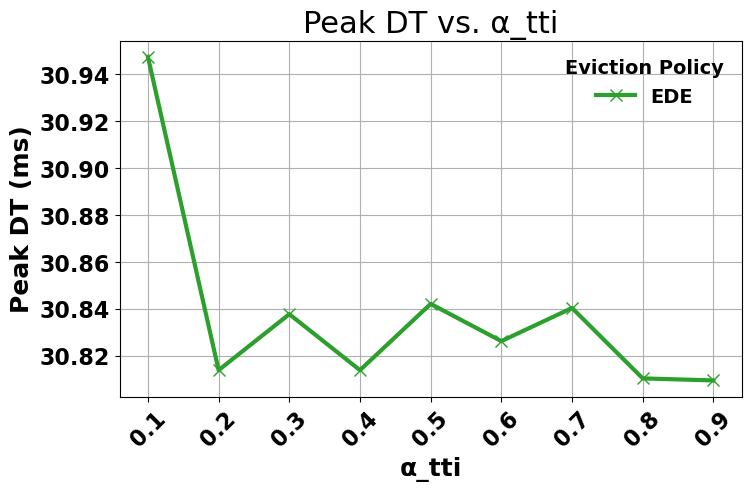

In [41]:
plt.plot(
    ede_ewma_df['α_TTL'],
    ede_ewma_df['PeakServiceTimeUsed1'],
    marker='x',
    linewidth=3,
    color='tab:green',
    label='EDE'
)

# plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.xticks(rotation=45) 
plt.title("Peak DT vs. α_tti")
plt.xlabel("α_tti")
plt.ylabel("Peak DT (ms)")
plt.grid(True)
plt.legend(title="Eviction Policy")
plt.show()